# Word Embedding
***

- Word embedding is a method used to find relations between vectors
- Typically defined as a way to convert words to context vectors
- Vectors that are similar, means the words are similar in context :D

**Preprocessing**
1. `Load in Data`
2. `Remove Stop Words`
3. `Convert to Bigram`
4. `Convert Bigram to One-Hot-Encodings`

**Training**
1. `Split Bigram to Train, Test Data`
2. `Create Linear Model`
3. `Obtain Weights After Training`
4. `Vizualize Points`

In [9]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import nltk

from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
def remove_stop_words(data):
    stop_words = ["is", "a", "has", "an"]

    removed_stop_words_list = []
    
    for i, _ in enumerate(data):
        removed_stop_words_list.append([word for word in data[i].replace("\n", "").split(" ") if word not in stop_words])

    return removed_stop_words_list
                
def bigrams(data):
    bigram_list = []

    for _, word in enumerate(data):
        for j in range(len(word) - 1):
            bigram_list.append(word[j : j+2])
    
    return bigram_list

def vocabulary(bigram_data):
    vocab_list = []
    for bigram in bigram_data:
        vocab_list.extend(bigram)

    return list(set(vocab_list))

def one_hot_encoder(vocab_data, bigram_data):
    one_hot_values = {}
    bigram_one_hot_list = []
    for i, key in enumerate(vocab_data):
        one_hot_values[key] = [0 if i != j else 1 for j in range(len(vocab_data))]

    print("One Hot Encoder\n------------\n")
    print(np.array([f"{key}: {value}" for key, value in one_hot_values.items()]))
    for i, (X,y) in enumerate(bigram_data):
        # print(bigram_data[i])
        bigram_one_hot_list.append([one_hot_values[X], one_hot_values[y]])

    return np.array(bigram_one_hot_list)

#### Preprocessing
1. Load in Data
   - Using a default txt file with a bunch of names and adjectives
   - Python's **`open()`** function will open the text file
   - **`readlines()`** function will split the text file by new line


In [11]:
file = open("text_data.txt", "r")
data = file.readlines()

2. Remove Stop Words
   - Using our built function **`remove_stop_words()`**, it cleans the sentence (removes "\n")
   - Then, removes stop words ("is", "a", "an", "has") from the sentence

In [12]:
cleaned_data = remove_stop_words(data)
cleaned_data

[['Branden', 'good', 'person'],
 ['Shlok', 'great', 'man'],
 ['Jason', 'nice', 'person'],
 ['David', 'bad', 'human'],
 ['Chris', 'great', 'personality'],
 ['Sara', 'interesting', 'woman']]

3. Bigrams
   - Using our built function **`bigrams()`**, it converts our newly cleaned txt_data to bigrams
   - We will use sliding window technique to get all the bigrams
   <br></br>
  
**What is Bigrams**
- A sequence of two words, the first value being the feature and the seconds value being the label
- Example: "I am great" will become ("I", "am") and ("am great")
      

In [13]:
bigram_data = bigrams(cleaned_data)
vocab_data = vocabulary(bigram_data)

bigram_data

[['Branden', 'good'],
 ['good', 'person'],
 ['Shlok', 'great'],
 ['great', 'man'],
 ['Jason', 'nice'],
 ['nice', 'person'],
 ['David', 'bad'],
 ['bad', 'human'],
 ['Chris', 'great'],
 ['great', 'personality'],
 ['Sara', 'interesting'],
 ['interesting', 'woman']]

4. Convert Bigrams to One-Hot-Encodings
   - Using our built function **`one_hot_encoder()`**, it cleans the sentence (removes "\n")
   - Then, removes stop words ("is", "a", "an", "has") from the sentence

In [14]:
train_data = one_hot_encoder(vocab_data, bigram_data)
train_data

One Hot Encoder
------------

['Branden: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'bad: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'man: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'Chris: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'person: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'David: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'human: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'interesting: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]'
 'personality: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'
 'Sara: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'
 'Shlok: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'
 'good: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]'
 'nice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]'
 'Jason: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'
 'great: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]'
 'woman: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]']


array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Training
1. Splitting the data into features and labsl
   - Using **`numpy.array()`** to split the data by column
   - `X` represents our features
   - `y` represents our labels


In [15]:
X = train_data[:, 0]
y = train_data[:, 1]

2. Creating the Model
   - Using **`nn.Module`** to create our EmbeddingScratch Model

**Attributes**
- `vocab_size`: the total unique words in our bigrams
- `embed_size`: the size of our word embeddings

In [16]:
class Embedding_Scratch(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super().__init__()
        
        self.input_layer = nn.Linear(vocab_size, embed_size)
        self.output_layer = nn.Linear(embed_size, vocab_size)

    def forward(self, x):
        x = self.input_layer(x)
        return self.output_layer(x)


3. Initializing the Optimizer and Loss Function
    - Using Pytorch's **`nn.CrossEntropyLoss()`** and **`torch.optim.Adam()`** to create our loss function and optimization algorithm
  
   
**Optimizer**
- Adam Algorithm to optimize our model

**Loss Function**
- Cross Entropy Loss function to calculate the loss
- We use Cross Entropy Loss because we are predicting categories (words in this case)

In [17]:
vocab_size = y.shape[1]
print(vocab_size)
# -- Hyperparameter -- #
EMBED_SIZE = 2
LR = 0.01

word_embedding_scratch = Embedding_Scratch(vocab_size, EMBED_SIZE)
word_embedding_scratch.to(device) # sets the model into the gpu

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=word_embedding_scratch.parameters(), lr=LR)

16


In [20]:
def train_model(model, X,y, criterion, optimizer, epoches):
    for i in tqdm(range(epoches)):
        train_loss = 0
        
        model.train()
        for j, _ in enumerate(X):
            y_pred = model(torch.Tensor(X[j]).to(device))
            loss = criterion(y_pred, torch.Tensor(y[j]).to(device))
            train_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_loss /= len(X)
        if i % 100 == 0 or i == epoches - 1:
            print(f"Epoch {i} - Train Loss {train_loss:.4f}")
    

In [21]:
train_model(word_embedding_scratch, X, y, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 - Train Loss 2.7425
Epoch 100 - Train Loss 0.3660
Epoch 200 - Train Loss 0.1749
Epoch 300 - Train Loss 0.1393
Epoch 400 - Train Loss 0.1282
Epoch 500 - Train Loss 0.1236
Epoch 600 - Train Loss 0.1213
Epoch 700 - Train Loss 0.1200
Epoch 800 - Train Loss 0.1192
Epoch 900 - Train Loss 0.1186
Epoch 999 - Train Loss 0.1181


4. Plotting and Visualizing the Context Vectors
   - **`Pandas.DataFrame`** to create a dataframe of context vectors
   - **`Seaborn`** to create a scatterplot of our context vectors
   - **`Matplotlib.pyplot`** to create annotate and label our context vectors

In [22]:
context_vectors = word_embedding_scratch.state_dict()["output_layer.weight"]

context_vector_df = pd.DataFrame(context_vectors.cpu().detach().numpy())
context_vector_df.index = vocab_data

context_vector_df

,0,1
Branden,1.449292,1.022213
bad,3.180907,3.878277
man,1.963861,-2.470642
Chris,1.469317,1.042998
person,-4.997764,3.189914
David,1.492886,1.039585
human,6.617612,2.562927
interesting,-2.799887,2.411041
personality,1.964943,-2.576770
Sara,1.428186,1.010209


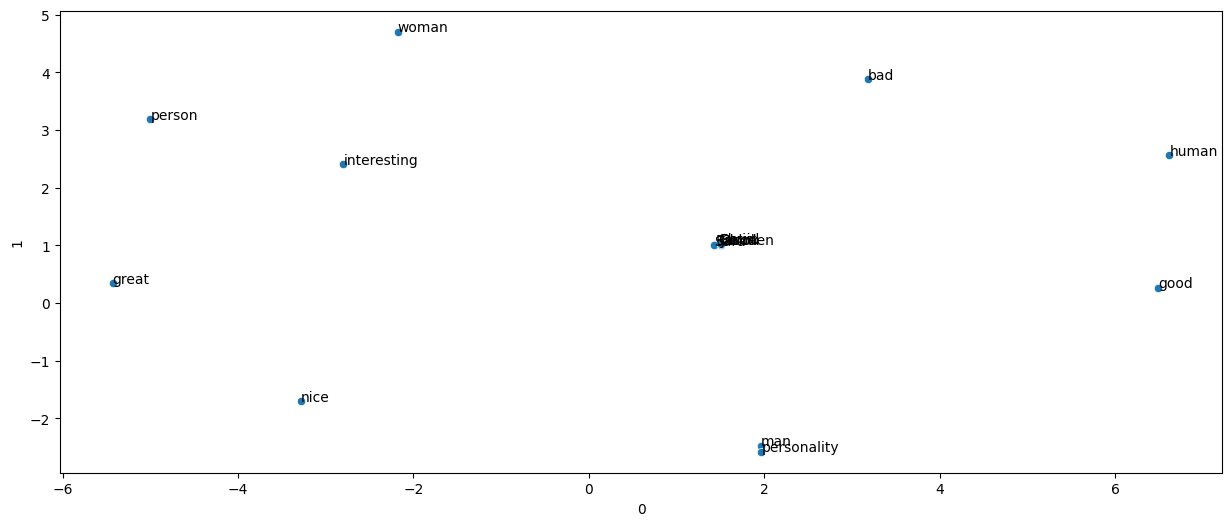

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15,6))
embedding_graph = sns.scatterplot(data=context_vector_df, x=context_vector_df[0], y=context_vector_df[1])

for i, word in enumerate(vocab_data):
    data = context_vectors.cpu().detach().numpy()
    embedding_graph.annotate(word, tuple(data[i]))

In [ ]:
embedding = nn.Embedding(16, 3)
embedding.state_dict()

In [ ]:
# example_data = torch.arange(16)

class Embedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super().__init__()
        self.l_0 = nn.Embedding(vocab_size, embed_size)
        
    def forward(self, x):
        return self.l_0(x)

In [ ]:
pytorch_embedding = Embedding(16, 3)
pytorch_embedding.to(device)
optimizer = torch.optim.Adam(params=pytorch_embedding.parameters(), lr=LR)
train_model(pytorch_embedding, X, y, criterion, optimizer, 1000)